# Meta 3.2 Resolver problema Social Ads (Clasificación) usando Vecinos mas Cercanos.

-   **Primero**. Leer y Analizar la presentación de la Uniddad 3. Analítica de datos, la cual se encuentra en este modulo Presentación Unidad 3.

-   **Segundo**. El alumno debe verificar que tiene instalado el lenguaje de programación Python, algún IDE de su preferencia ya sea PyCharm o Visual Studio Code.

-   **Tercero**. El alumno debe instalar la librería scikitlearn y verificar que tiene disponibles las librerías utilizadas en practicas pasadas.

-   **Cuarto**. Ver el siguiente material acerca del algoritmo y uso de la libreria scikitlearn:

-   **Quinto**. Descargar el archivo Social Network Ads , es un archivo csv que contiene la edad y el salario estimado de un conjunto de personas potenciales a ser compradores. Cuenta con una columna de 0 ó 1 depende si realizo una compra.

-   **Sexto**. El alumno revisará el siguiente video, siguiendo al video deberá implementar el algoritmo K Vecinos Más Cercanos utilizando los datos del paso anterior para estimar si una persona realizará o no una compra. 

-   **Septimo**. El alumno entregará el notebook generado del paso anterior, utilizando los datos del archivo Social Network Ads.

-   **Octavo**. Entregar el archivo notebook , liga a github o liga a google colab en la plataforma BlackBoard.

<FONT style="color:red" SIZE=6 FACE="courier"> 
 Alumna --> Kathia Karely Rivera Rodriguez
</FONT>

In [ ]:
# Alumna --> Kathia Karely Rivera Rodriguez 
# Matricula --> 1285290
# Grupo -->  382

# pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos del archivo CSV
data = pd.read_csv(r'C:\Users\Asus\Desktop\Datos_Social_Network_Ads\Social_Network_Ads.csv')

# Selección de características (Edad y Salario) y variable objetivo (Purchased)
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo KNN con k=5 (puedes ajustar el valor de k según sea necesario)
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)


Precisión del modelo KNN: 0.9333333333333333
Matriz de confusión:
[[68  5]
 [ 3 44]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



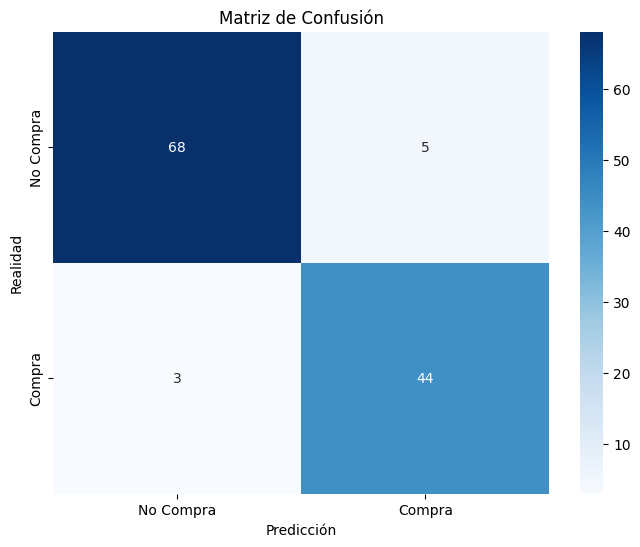

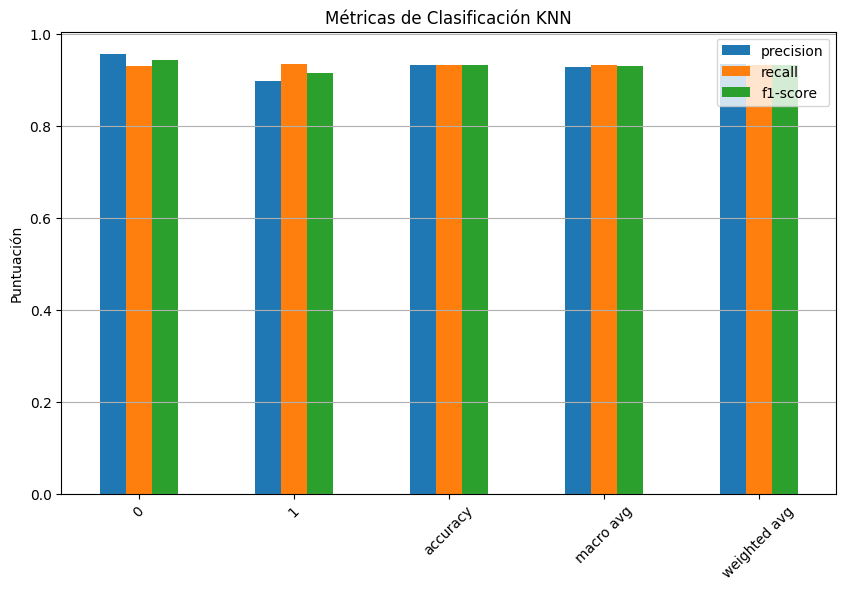

In [7]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy}")

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Mostrar el reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(class_report)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Compra', 'Compra'], yticklabels=['No Compra', 'Compra'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Mostrar el reporte de clasificación
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# Graficar las métricas de clasificación
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Métricas de Clasificación KNN')
plt.ylabel('Puntuación')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


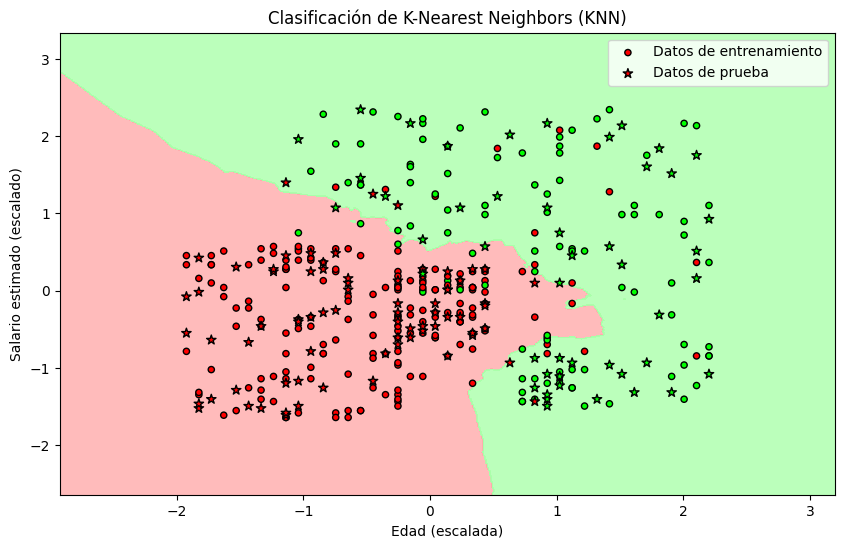

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Crear un mapa de colores para la gráfica
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Determinar los límites de la gráfica
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
h = 0.01  # Paso en la malla

# Crear una malla de puntos para graficar las regiones de decisión
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir las clases para cada punto en la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar las regiones de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Graficar los puntos de entrenamiento y prueba
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Datos de entrenamiento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='*', label='Datos de prueba')

# Personalizar la gráfica
plt.title("Clasificación de K-Nearest Neighbors (KNN)")
plt.xlabel("Edad (escalada)")
plt.ylabel("Salario estimado (escalado)")
plt.legend()
plt.show()


Precisión con k=1: 0.8833333333333333
Precisión con k=2: 0.8583333333333333
Precisión con k=3: 0.925
Precisión con k=4: 0.9083333333333333
Precisión con k=5: 0.9333333333333333
Precisión con k=6: 0.9333333333333333
Precisión con k=7: 0.9416666666666667
Precisión con k=8: 0.95
Precisión con k=9: 0.95
Precisión con k=10: 0.9333333333333333


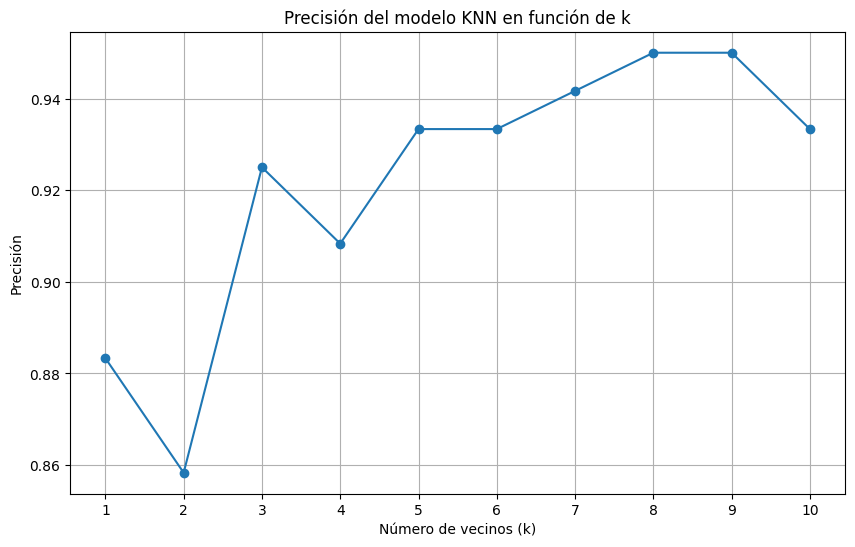

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar los datos del archivo CSV
data = pd.read_csv(r'C:\Users\Asus\Desktop\Datos_Social_Network_Ads\Social_Network_Ads.csv')

# Selección de características (Edad y Salario) y variable objetivo (Purchased)
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Listas para almacenar las precisiones
k_values = range(1, 11)
accuracies = []

# Evaluar el modelo KNN para diferentes valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Precisión con k={k}: {accuracy}")

# Graficar la precisión en función de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Precisión del modelo KNN en función de k')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid()
plt.show()